<a href="https://colab.research.google.com/github/phaneo/TF2-Complete/blob/main/7_Time_Series_forecasting_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TF + Milestone project 3: BitPredict

In [ ]:
# !wget https://raw.githubusercontent.com/phaneo/TF2-Complete/main/BTC-USD.csv 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-09 13:44:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-09-09 13:44:50 (6.04 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing data using Pandas

In [ ]:
import pandas as pd

btc_df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                     parse_dates=["Date"], # parse the date column and tell pandas column 1 is a datetime
                     index_col=["Date"]) 

btc_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(btc_df)

2787

In [ ]:
btc_df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


Note: We've collected historical price data of BTC for the past 8 years, which is 2909 samples.

DL models like lots & lots of data (thousands to millions). A smaller sample size of data is very common in time series problems.

Note : The seasonality of a time series dataset is referred as the no. of samples per year. Since our BTC data is one sample per day, it has a seasonality of daily or value of 365.

In [ ]:
# 8 * 365

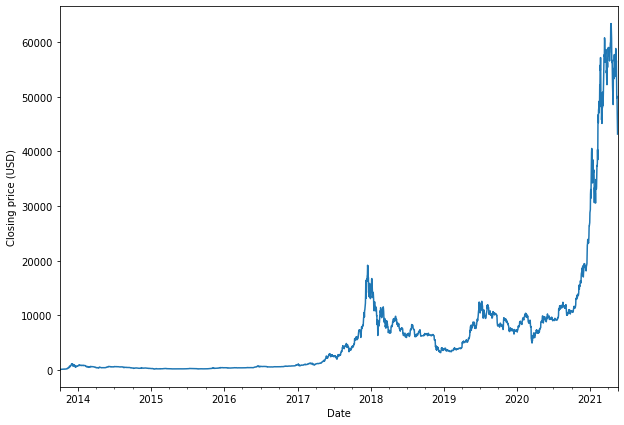

In [ ]:
btc_df["Closing Price (USD)"].plot(kind = "line", figsize = (10, 7), ylabel = "Closing price (USD)")

In [ ]:
btc_usd_df = pd.DataFrame(btc_df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)" : "Price (USD)"})
btc_usd_df.head()

,Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


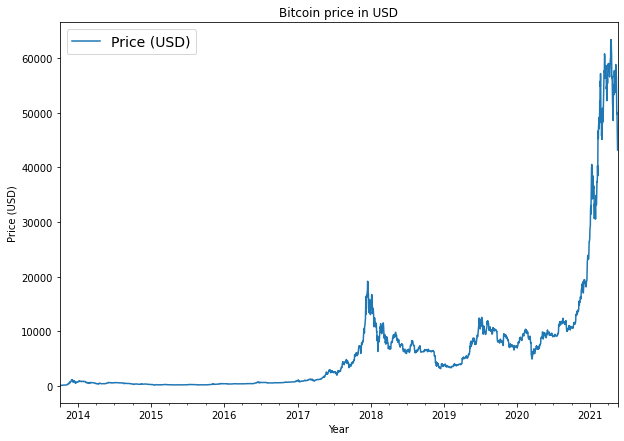

In [ ]:
btc_usd_df["Price (USD)"].plot(figsize = (10, 7), title = "Bitcoin price in USD", xlabel = "Year", ylabel = "Price (USD)").legend(fontsize = 14)

## Importing data using Python's CSV module

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) # skip the first row, gets rid of column titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates not strings
    btc_price.append(float(line[4])) # get the closing price as float


timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [124.75166,
  125.7585,
  125.66566,
  118.675,
  121.93633,
  121.85216,
  121.99166,
  123.64016,
  124.7835,
  128.01683])

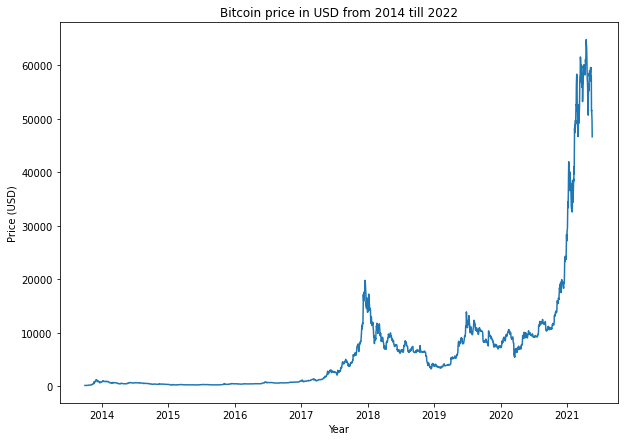

In [ ]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10, 7))
plt.plot(timesteps, btc_price)
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Bitcoin price in USD from 2014 till 2022")
plt.show()

## Creating train & test datasets **the wrong way**

In [ ]:
btc_usd_df[:5]

,Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin date array
timesteps = btc_usd_df.index.to_numpy()
prices = btc_usd_df["Price (USD)"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

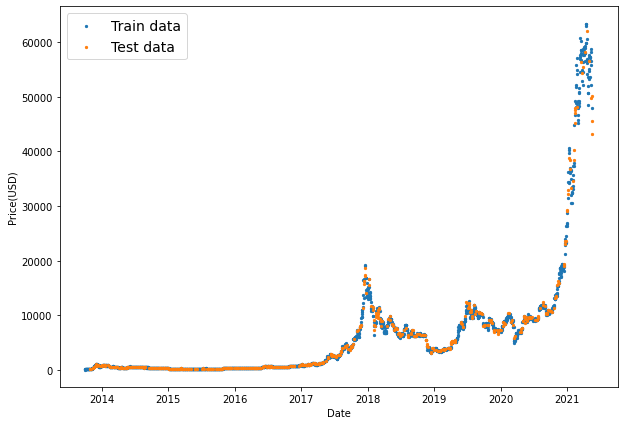

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend(fontsize=14)
plt.show()

We can see that splitting dataset this way in random, causes data leak where data from the future leaks into the past.

## Creating train & test splits **the right way**

In [ ]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229,), (2229,), (558,), (558,))

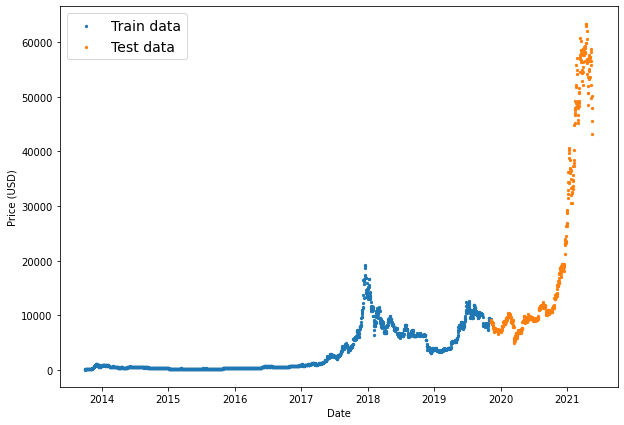

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s= 5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(fontsize = 14)
plt.show()

In [ ]:
# Create a plotting function

def plot_time_series(timesteps, prices, format=".", start = 0, end = None, label = None):  
  plt.plot(timesteps[start:end], prices[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price (USD)")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)  

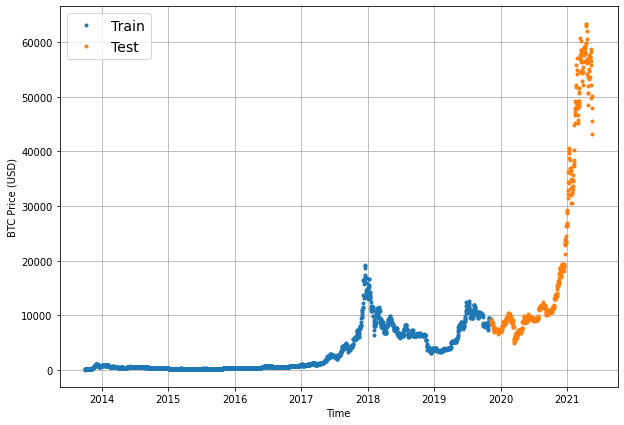

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(X_train, y_train, label = "Train")
plot_time_series(X_test, y_test, label = "Test")

# Modelling experiments

**Horizon** = No. of timesteps into the future we're going to predict
**Window size** = No. of timesteps we're going to use to predict **horizon**.

We're going to run the following model experiments to pick the best model for our problem:

0. Naive model (baseline)
1. Dense model - horizon = 1, window = 7
2. Same as model 1 - horizon = 1, window = 30
3. Same as model 1 - horizon = 7, window = 30
4. Conv1D
5. LSTM
6. Same as model 1 but with multivariate data
7. N-BEATS algorithm
8. Ensemble
9. Future prediction model
10. Same as model 1 with turkey data involved

## Model 0: Naive forecasting model (Baseline)

The formula for naive forecasting is:
$$\hat{y}_{t} = y_{t-1}$$

The prediction at timestep *t* (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1. 

In [ ]:
# Create naive forecast

naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

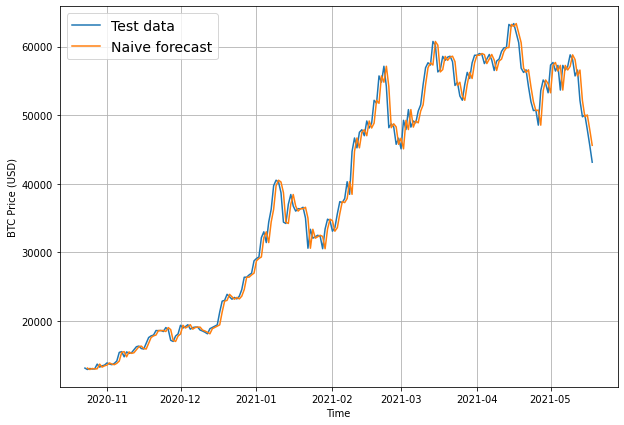

In [ ]:
# Plot naive forecast
plt.figure(figsize = (10, 7))
# plot_time_series(timesteps = X_train, prices= y_train, label = "Train data")
plot_time_series(timesteps = X_test, prices = y_test, start = 350, format = "-", label = "Test data")
plot_time_series(timesteps = X_test[1:], prices = naive_forecast, start = 350, format = "-", label = "Naive forecast")

## Evaluating a time series model

Since we are predicting a number, we are looking at a form of regression problem.

Hence we can evaluate our model using metrics similar to regression such as:

* MAE
* MSE
* RMSE
* MAPE
* MASE

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_abs_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [ ]:
mean_abs_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_abs_scaled_error(y_true, y_pred)

  metrics = {
              "mae": mae.numpy(),
              "mse": mse.numpy(),
              "rmse": rmse.numpy(),
              "mape": mape.numpy(),
              "mase": mase.numpy(),
  }
  
  return metrics

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Data Part 2: Windowing our dataset

Windowing our dataset helps us turn our data into a supervised learning problem

``` 
Windowing for one week

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
# What we want to do with our BTC data
print(f"We want to use this: {prices[:7]} to predict this: {prices[7]}")

We want to use this: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict this: 123.033


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of btc price data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset

  Ex. If horizon = 1
  Input = [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  
  """
  return x[:, :-horizon], x[:, -horizon:]



In [ ]:
# Test our function 
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We need to create a function that will:
1. Create a window step of specific window size. Ex: [0, 1, 2, 3, 4, 5, 6]
2. Use Numpy indexing to create a 2D array of multiple window steps.
   Ex: 
   ```
   [[0, 1, 2, 3, 4, 5, 6],
    [1, 2, 3, 4, 5, 6, 7],
    [2, 3, 4, 5, 6, 7, 8]]
   ```
3. Uses the 2D array of multiple window steps to index on a target series (historical data).
4. Uses our `get_labelled_windows()` function to turn the window steps into windows with a specified horizon.

In [ ]:
# Create a function to view Numpy arrays as windows
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)
  
  # 2. Create a 2D array of multiple window steps (minux 1 for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T

  # print(f"Window indexes: {window_indexes, window_indexes.shape}")

  # 3. Index on the target series with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(f"Windowed array: {windowed_array}")
  
  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
len(prices)

2787

In [ ]:
# View the first three windows & labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last three windows & labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


🔑 **Note**: We can use `tf.keras.preprocessing.timeseries_dataset_from_array()` function to achieve the same results our custom function does, eliminating the need to create a function altogether.

## Turning our windows into training & test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
y_train[:5]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866])

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Creating a Model Checkpoint

In [ ]:
import os

def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

## Model 1: Dense model(window: 7, horizon: 1)

* A single dense layer with 128 units and ReLU function
* An output layer with linear activation
* Adam optimization and MAE loss function
* Batch size of 128
* 100 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
                                layers.Dense(128, activation = "relu"),
                                layers.Dense(HORIZON, activation = "linear")                                
], name = "model_1_dense")

# 2. Compile the model
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
history_model_1 = model_1.fit(x = train_windows,
                              y = train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 43ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9992 - val_mae: 1005.9992 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5938 - val_loss: 923.2863 - val_mae: 923.2863 - val_mse: 2868221.2500
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.7500
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.8125 - val_loss: 895.2236 - val_mae: 895.2236 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 36ms/step - loss: 158.5

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# Evaluate model_1
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9752 - mae: 585.9752 - mse: 1197801.2500


[585.9752197265625, 585.9752197265625, 1197801.25]

In [ ]:
# Load the best performed model and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.8750


[568.9510498046875, 568.9510498046875, 1171743.875]

## Making forecasts with a model

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of prediction

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.713, 8769.888, 9015.712, 8795.52 , 8723.812, 8730.111,
       8691.953, 8502.056, 8460.962, 8516.548], dtype=float32)>

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)

model_1_results

{'mae': array([11928.929 , 11795.891 , 11974.977 , 11948.295 , 11954.37  ,
        12005.419 , 12095.949 , 12114.574 , 12074.432 , 12274.319 ,
        12328.178 , 12355.67  , 12659.423 , 12910.017 , 12878.645 ,
        13093.805 , 12949.455 , 13008.3125, 12720.619 , 12814.962 ,
        12581.032 , 12707.599 , 12820.863 , 12856.264 , 12869.688 ,
        12947.94  , 12808.82  , 12728.707 , 12714.619 , 12702.064 ,
        12856.511 , 12927.328 , 12960.66  , 12967.023 , 12928.018 ,
        13054.392 , 13032.358 , 13233.182 , 13509.829 , 12790.82  ,
        13002.82  , 13009.273 , 12891.54  , 12929.485 , 12987.106 ,
        12930.547 , 12948.688 , 12972.473 , 12937.096 , 12872.538 ,
        12818.356 , 12918.381 , 12975.588 , 12979.921 , 13169.249 ,
        12887.851 , 12853.18  , 12845.99  , 12591.284 , 12378.13  ,
        12360.252 , 12528.333 , 12347.6875, 12353.043 , 12309.106 ,
        12329.122 , 11962.128 , 11905.701 , 11974.921 , 11866.165 ,
        11859.348 , 12016.113 , 12007.855

In [ ]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [ ]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 568.95105,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

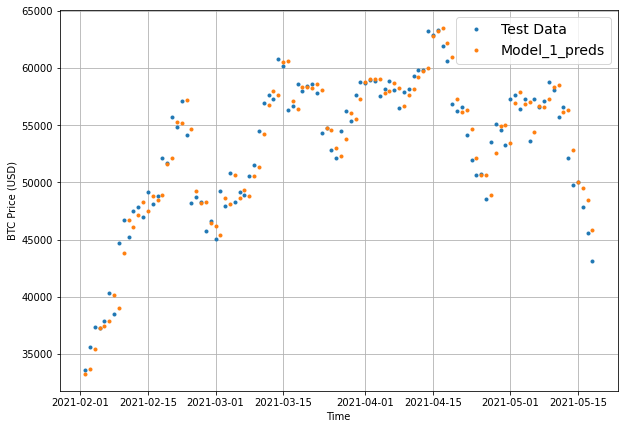

In [ ]:
offset = 450
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], prices = test_labels[:, 0], start = offset, label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], prices = model_1_preds, start = offset, label = "Model_1_preds")

## Model 2: Dense (horizon = 1, window = 30)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels,
                                                                                test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                                layers.Dense(128, activation = "relu"),
                                layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 1,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741505.5000 - val_loss: 3900.2532 - val_mae: 3900.2532 - val_mse: 32752722.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.3125 - val_loss: 1587.0746 - val_mae: 1587.0746 - val_mse: 6817662.0000
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.1250 - val_loss: 1220.6891 - val_mae: 1220.6891 - val_mse: 4447004.5000
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2656 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837505.5000
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0469 - val_loss: 1007.6486 - val_mae: 1007.6486 - val_mse: 3224228.7500
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620 - mae: 608.9620 - mse: 1281440.7500


[608.9619750976562, 608.9619750976562, 1281440.75]

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620 - mae: 608.9620 - mse: 1281440.7500


[608.9619750976562, 608.9619750976562, 1281440.75]

In [ ]:
model_2_preds = make_preds(model = model_2,
                           input_data = test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'mae': 608.962,
 'mse': 1281440.6,
 'rmse': 1132.0073,
 'mape': 2.769341,
 'mase': 1.0644715}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

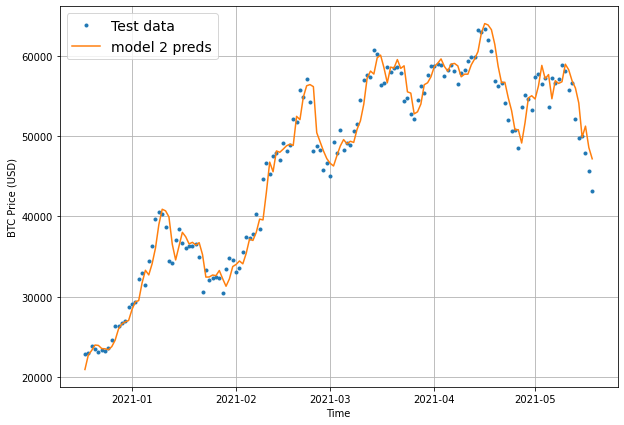

In [ ]:
offset = 400
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], prices = test_labels[:, 0], start = offset, label = "Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], prices = model_2_preds, start = offset, format = "-", label = "model 2 preds")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(x = prices, horizon= HORIZON, window_size = WINDOW_SIZE)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                test_split = 0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                                layers.Dense(128, activation = "relu"),
                                layers.Dense(HORIZON)
], name = "model_3_dense")

model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 0,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1340.4272 - mae: 1340.4272 - mse: 5758703.5000


[1340.42724609375, 1340.42724609375, 5758703.5]

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1234.8838 - mae: 1234.8838 - mse: 5393733.5000


[1234.8837890625, 1234.8837890625, 5393733.5]

In [ ]:
model_3_preds = make_preds(model_3, input_data = test_windows)

model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)
model_3_results

{'mae': array([  561.22504 ,   301.9714  ,   297.9477  ,   413.8432  ,
          445.20914 ,   540.59717 ,   527.2284  ,   441.84564 ,
          498.77365 ,   639.19226 ,   803.132   ,   731.72614 ,
          678.6171  ,   797.18567 ,   575.334   ,   280.21136 ,
          239.92166 ,   246.152   ,   276.38705 ,   285.75488 ,
          118.8042  ,   135.45549 ,   191.11852 ,   251.82576 ,
          170.28928 ,   154.20027 ,   107.244835,    97.66267 ,
          111.26409 ,   139.85393 ,   269.1739  ,   369.812   ,
          270.48096 ,   263.1211  ,   247.72252 ,   255.50523 ,
          298.48172 ,   245.26395 ,   243.13072 ,   255.7583  ,
          416.62592 ,   150.97021 ,    94.16581 ,   101.62005 ,
           93.76974 ,    86.753136,    73.2793  ,    79.04513 ,
           89.541084,    93.11977 ,   106.798546,   141.09578 ,
          178.73668 ,   145.46994 ,   256.4566  ,   392.8164  ,
          560.91174 ,   552.8188  ,   536.1547  ,   535.2687  ,
          448.70453 ,   267.2329 

In [ ]:
model_3_preds.shape

TensorShape([551, 7])

## Making our evaluation function work for larger horizons

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_abs_scaled_error(y_true, y_pred)

  # Account for diff sized metrics
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  
  metrics = {
              "mae": mae.numpy(),
              "mse": mse.numpy(),
              "rmse": rmse.numpy(),
              "mape": mape.numpy(),
              "mase": mase.numpy(),
  }
  
  return metrics

In [ ]:
model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1234.8838,
 'mse': 5393734.0,
 'rmse': 1419.1362,
 'mape': 5.4874988,
 'mase': 2.1974063}

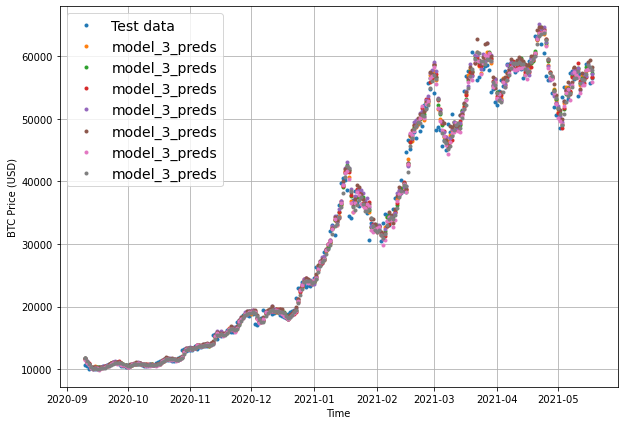

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], prices = test_labels[:, 0], start = offset, label = "Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], prices = model_3_preds, start = offset, label = "model_3_preds")

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9250.798 , 9279.124 , 9394.038 , 9400.202 , 9479.183 , 9375.264 ,
        9302.472 ],
       [8945.557 , 9029.439 , 9164.761 , 8997.948 , 9077.654 , 8971.883 ,
        9081.854 ],
       [8883.711 , 8987.258 , 9057.07  , 8901.714 , 9001.872 , 8817.509 ,
        8971.558 ],
       [9090.947 , 9014.501 , 9010.567 , 9096.448 , 9052.974 , 9016.151 ,
        9001.476 ],
       [9002.045 , 8972.497 , 8869.7705, 8980.389 , 9212.569 , 9072.293 ,
        8887.335 ]], dtype=float32)>

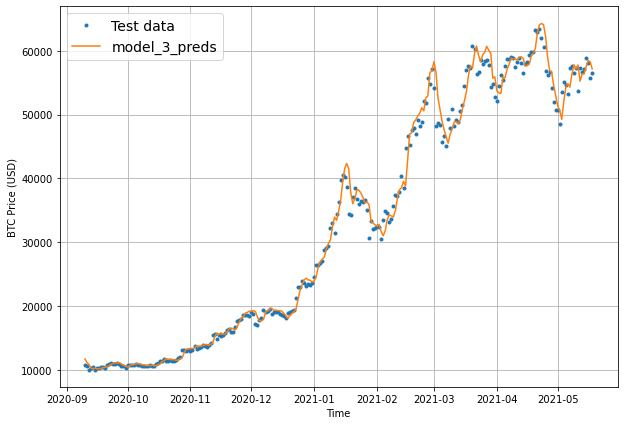

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_windows):], prices = test_labels[:, 0], start = offset, label = "Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], 
                 prices = tf.reduce_mean(model_3_preds, axis = 1), 
                 start = offset, 
                 format = "-", 
                 label = "model_3_preds")

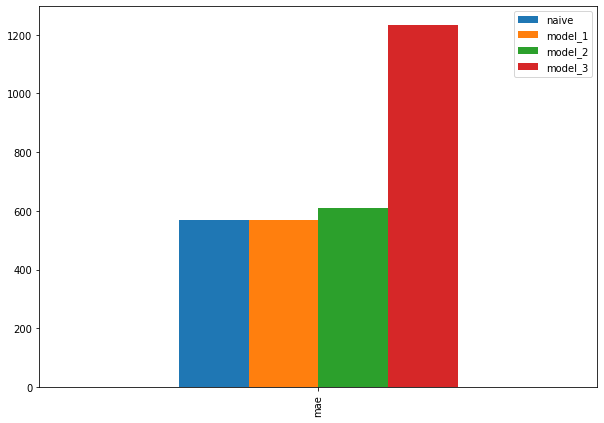

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "model_1": model_1_results["mae"],
              "model_2": model_2_results["mae"],
              "model_3": model_3_results["mae"]}, index = ["mae"]).plot(figsize = (10, 7), kind = "bar")

## Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use Conv1D layer, we need an input shape of (batch_size, timesteps, input_dim). So we need our data in that shape.

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)) # add an extra dim for input_dim

In [ ]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape: {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                                layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
                                layers.Conv1D(128, 5, strides = 1, padding = "causal", activation = "relu"),
                                layers.Dense(HORIZON)
], name = "model_4_conv1d")

model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

history_model_4 = model_4.fit(train_windows,
                              train_labels,
                              batch_size = 128,
                              epochs = 100,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
18/18 [==============================] - 9s 47ms/step - loss: 1207.3817 - mae: 1207.3817 - mse: 5128398.0000 - val_loss: 2320.6218 - val_mae: 2320.6218 - val_mse: 13063541.0000
Epoch 2/100
18/18 [==============================] - 1s 37ms/step - loss: 316.2171 - mae: 316.2171 - mse: 408753.9375 - val_loss: 1467.2799 - val_mae: 1467.2799 - val_mse: 5375009.5000
Epoch 3/100
18/18 [==============================] - 1s 52ms/step - loss: 192.6853 - mae: 192.6853 - mse: 187429.8281 - val_loss: 1164.7074 - val_mae: 1164.7074 - val_mse: 3801948.0000
Epoch 4/100
18/18 [==============================] - 1s 38ms/step - loss: 177.3535 - mae: 177.3535 - mse: 166088.1562 - val_loss: 981.6695 - val_mae: 981.6695 - val_mse: 3154571.2500
Epoch 5/100
18/18 [==============================] - 1s 39ms/step - loss: 172.3467 - mae: 172.3467 - mse: 159527.5625 - val_loss: 960.8710 - val_mae: 960.8710 - val_mse: 3055978.0000
Epoch 6/100
18/18 [==============================] - 1s 40ms/step - loss: 1

In [ ]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 10ms/step - loss: 610.1537 - mae: 610.1537 - mse: 1242909.6250


[610.1537475585938, 610.1537475585938, 1242909.625]

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.8284 - mae: 570.8284 - mse: 1176671.2500


[570.828369140625, 570.828369140625, 1176671.25]

In [ ]:
model_4_preds = make_preds(model = model_4,
                           input_data = test_windows)

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)

model_4_results

{'mae': 570.8283,
 'mse': 1176671.1,
 'rmse': 1084.7448,
 'mape': 2.5593352,
 'mase': 1.0027872}

## Model 5: RNN (LSTM)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE), name = "input_layer")
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation = "relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
outputs = layers.Dense(HORIZON, name = "output_layer")(x)

model_5 = tf.keras.Model(inputs, outputs, name = "model_5_LSTM")

model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                )

history_model_5 = model_5.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 1,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2534.5144 

18/18 [==============================] - 3s 129ms/step - loss: 2323.6077 - val_loss: 9222.6221
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 859.7301 

18/18 [==============================] - 2s 102ms/step - loss: 695.4739 - val_loss: 1486.0378
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 266.4731

18/18 [==============================] - 2s 101ms/step - loss: 237.3842 - val_loss: 1298.9087
Epoch 4/100
10/18 [===============>..............] - ETA: 0s - loss: 200.8824

18/18 [==============================] - 2s 101ms/step - loss: 181.9185 - val_loss: 966.6432
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 173.4023 - val_loss: 970.9296
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 173.3822 - val_loss: 981.0975
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 180.2700

18/18 [==============================] - 2s 119ms/step - loss: 171.9762 - val_loss: 921.8434
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 163.7985

18/18 [==============================] - 2s 101ms/step - loss: 165.5515 - val_loss: 900.0497
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 159.1929

18/18 [==============================] - 2s 103ms/step - loss: 160.4305 - val_loss: 853.6299
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 168.6475 - val_loss: 931.5431
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 169.2183 - val_loss: 926.0713
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 166.3748 - val_loss: 916.8346
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 166.8522 - val_loss: 909.6310
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 161.6482 - val_loss: 866.7496
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 155.9960 - val_loss: 896.1780
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 159.4309 - val_loss: 882.4391
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 157.7812 - val_loss: 956.9371
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 1

18/18 [==============================] - 2s 100ms/step - loss: 150.1062 - val_loss: 844.7767
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 149.1968 - val_loss: 861.0685
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 147.1761 - val_loss: 848.1241
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 152.1306

18/18 [==============================] - 2s 122ms/step - loss: 145.5848 - val_loss: 840.6231
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 142.8045

18/18 [==============================] - 2s 101ms/step - loss: 145.0945 - val_loss: 813.1295
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 147.1368

18/18 [==============================] - 2s 101ms/step - loss: 143.2227 - val_loss: 805.5842
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 141.3780

18/18 [==============================] - 2s 118ms/step - loss: 141.6531 - val_loss: 785.5984
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 140.8680 - val_loss: 801.3979
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 141.3804 - val_loss: 791.8160
Epoch 31/100
12/18 [===================>..........] - ETA: 0s - loss: 139.9352

18/18 [==============================] - 2s 101ms/step - loss: 138.0144 - val_loss: 768.1625
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 138.1926

18/18 [==============================] - 2s 102ms/step - loss: 135.9883 - val_loss: 764.0204
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 136.6867 - val_loss: 791.4828
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 142.0320

18/18 [==============================] - 2s 100ms/step - loss: 136.4118 - val_loss: 750.6531
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 133.7257 - val_loss: 754.5988
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 131.3762

18/18 [==============================] - 2s 122ms/step - loss: 133.4312 - val_loss: 734.5640
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 131.2189 - val_loss: 747.5995
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 133.7071

18/18 [==============================] - 2s 101ms/step - loss: 129.7771 - val_loss: 718.2686
Epoch 39/100
13/18 [====================>.........] - ETA: 0s - loss: 130.4690

18/18 [==============================] - 2s 101ms/step - loss: 129.4270 - val_loss: 716.9465
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6303 - val_loss: 728.0188
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 130.7772

18/18 [==============================] - 2s 100ms/step - loss: 127.6953 - val_loss: 701.7618
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 126.2242 - val_loss: 706.0325
Epoch 43/100
12/18 [===================>..........] - ETA: 0s - loss: 122.1359

18/18 [==============================] - 2s 121ms/step - loss: 125.7488 - val_loss: 693.8345
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 119.9671

18/18 [==============================] - 2s 103ms/step - loss: 125.5652 - val_loss: 689.3698
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 120.8933

18/18 [==============================] - 2s 134ms/step - loss: 123.4030 - val_loss: 682.0648
Epoch 46/100
13/18 [====================>.........] - ETA: 0s - loss: 128.1414

18/18 [==============================] - 2s 99ms/step - loss: 124.5756 - val_loss: 679.0645
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 122.3864 - val_loss: 700.8399
Epoch 48/100
13/18 [====================>.........] - ETA: 0s - loss: 120.7901

18/18 [==============================] - 2s 122ms/step - loss: 122.4737 - val_loss: 676.0283
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 122.0582 - val_loss: 690.3026
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 124.1240 - val_loss: 714.4885
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 125.1230 - val_loss: 778.5692
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 132.0012

18/18 [==============================] - 2s 101ms/step - loss: 123.6763 - val_loss: 660.4346
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 117.3057

18/18 [==============================] - 2s 101ms/step - loss: 119.8259 - val_loss: 659.2103
Epoch 54/100
11/18 [=================>............] - ETA: 0s - loss: 118.9204

18/18 [==============================] - 2s 102ms/step - loss: 120.3732 - val_loss: 654.3164
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 125.6378

18/18 [==============================] - 2s 121ms/step - loss: 118.6429 - val_loss: 648.6450
Epoch 56/100
13/18 [====================>.........] - ETA: 0s - loss: 122.5561

18/18 [==============================] - 2s 102ms/step - loss: 120.1063 - val_loss: 645.4896
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 123.7777 - val_loss: 680.8215
Epoch 58/100
12/18 [===================>..........] - ETA: 0s - loss: 118.0383

18/18 [==============================] - 2s 101ms/step - loss: 118.7787 - val_loss: 641.7518
Epoch 59/100
12/18 [===================>..........] - ETA: 0s - loss: 114.4179

18/18 [==============================] - 2s 99ms/step - loss: 117.9966 - val_loss: 641.0961
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3239 - val_loss: 643.4174
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 118.6151 - val_loss: 696.0721
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 122.4420 - val_loss: 749.9855
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 123.8672 - val_loss: 660.2910
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 117.0016 - val_loss: 687.4307
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 121.8536

18/18 [==============================] - 2s 124ms/step - loss: 119.8755 - val_loss: 632.8752
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1110 - val_loss: 640.7438
Epoch 67/100
13/18 [====================>.........] - ETA: 0s - loss: 118.4035

18/18 [==============================] - 2s 102ms/step - loss: 117.9292 - val_loss: 626.2725
Epoch 68/100
11/18 [=================>............] - ETA: 0s - loss: 115.0661

18/18 [==============================] - 2s 104ms/step - loss: 117.1456 - val_loss: 625.1245
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 119.3027 - val_loss: 625.7104
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 111.7659

18/18 [==============================] - 2s 102ms/step - loss: 114.9086 - val_loss: 621.8661
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 115.1822 - val_loss: 654.4707
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3393 - val_loss: 632.7345
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7310 - val_loss: 627.1373
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2199 - val_loss: 625.5247
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5961 - val_loss: 647.6739
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 115.2222

18/18 [==============================] - 2s 122ms/step - loss: 114.7675 - val_loss: 617.0222
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 116.8673 - val_loss: 666.9280
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1996 - val_loss: 627.6133
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 111.1984

18/18 [==============================] - 2s 101ms/step - loss: 113.5704 - val_loss: 611.2637
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2127 - val_loss: 621.4436
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3850 - val_loss: 631.9078
Epoch 82/100
12/18 [===================>..........] - ETA: 0s - loss: 120.6675

18/18 [==============================] - 2s 101ms/step - loss: 116.0263 - val_loss: 610.8793
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4978 - val_loss: 631.0351
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4766 - val_loss: 620.5226
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3218 - val_loss: 640.3288
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0620 - val_loss: 614.5500
Epoch 87/100
12/18 [===================>..........] - ETA: 0s - loss: 115.3732

18/18 [==============================] - 2s 101ms/step - loss: 112.4946 - val_loss: 609.2250
Epoch 88/100
13/18 [====================>.........] - ETA: 0s - loss: 115.4681

18/18 [==============================] - 2s 123ms/step - loss: 112.1963 - val_loss: 603.8983
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 112.1124 - val_loss: 629.1746
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 116.6988 - val_loss: 645.2277
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 115.3321 - val_loss: 626.2292
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3265 - val_loss: 612.6552
Epoch 93/100
10/18 [===============>..............] - ETA: 0s - loss: 112.5304

18/18 [==============================] - 2s 104ms/step - loss: 113.0708 - val_loss: 599.9893
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2166 - val_loss: 600.3155
Epoch 95/100
11/18 [=================>............] - ETA: 0s - loss: 106.7435

18/18 [==============================] - 2s 103ms/step - loss: 111.1020 - val_loss: 598.2369
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3853 - val_loss: 605.4749
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6455 - val_loss: 625.0032
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1201 - val_loss: 600.1553
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9818 - val_loss: 598.9257
Epoch 100/100
11/18 [=================>............] - ETA: 0s - loss: 120.5928

18/18 [==============================] - 2s 101ms/step - loss: 112.5498 - val_loss: 597.4623


In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")

model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 597.4624


597.46240234375

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8992.637, 8824.648, 9010.125, 8848.681, 8743.077], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 597.46234,
 'mse': 1275416.0,
 'rmse': 1129.3431,
 'mape': 2.6910973,
 'mase': 1.0495758}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

## Make a Multivariate time series dataset

In [ ]:
# Let's make a multivariate time series
btc_usd_df.head()

,Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add BTC reward halving events to our dataset
block_reward_1 = 50 # 03/01/2009
block_reward_2 = 25 # 08/11/2012
block_reward_3 = 12.5 # 09/07/2016
block_reward_4 = 6.25 # 18/05/2020

# block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - btc_usd_df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - btc_usd_df.index[0]).days
block_reward_3_days

2421

In [ ]:
bitcoin_prices_block = btc_usd_df.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Price (USD),block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


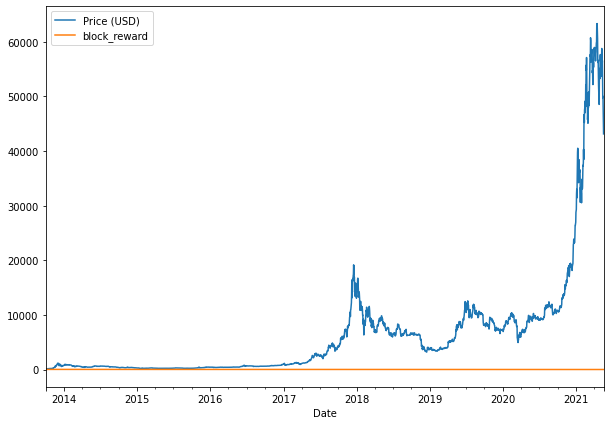

In [ ]:
bitcoin_prices_block.plot(figsize = (10, 7))

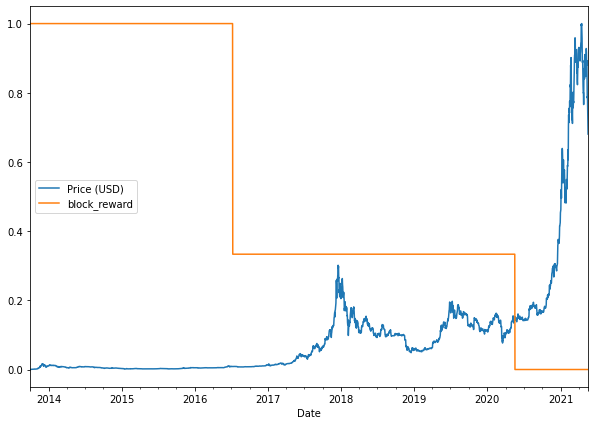

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price (USD)", "block_reward"]]),
                                                  columns = bitcoin_prices_block.columns,
                                                  index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10, 7))

## Creating a multivariate dataset using Pandas

Previously we have turned our univariate dataset into windowed dataset using the helper functions.

Since now we got multivariate dataset, we cannot use these functions and will have to use pd.DataFrame.shift() method to window our multivariate data.


In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the bitcoin historical data with block reward feature
btc_prices_windowed_df = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in window_size
  btc_prices_windowed_df[f"Price{i+1}"] = btc_prices_windowed_df["Price (USD)"].shift(periods= i+1)
btc_prices_windowed_df.head()

,Price (USD),block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


We've created a windowed dataset directly from our dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X (windows) and y (horizons) features

X = btc_prices_windowed_df.dropna().drop("Price (USD)", axis = 1).astype(np.float32)
y = btc_prices_windowed_df.dropna()["Price (USD)"].astype(np.float32)

X.head()

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price (USD), dtype: float32

In [ ]:
split_size = int(0.8 * len(X)) # 80% train, 20% test

# Create train data splits
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2224, 8), (2224,), (556, 8), (556,))

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON)
], name = "model_6_dense")

model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

history_model_6 = model_6.fit(X_train,
                              y_train,
                              epochs = 100,
                              batch_size = 128,
                              validation_data = (X_test, y_test),
                              callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 1234.6805 - val_loss: 2061.9075
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 351.5054 - val_loss: 1908.6731
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 235.4153 - val_loss: 1329.0583
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - val_loss: 1107.8473
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 187.2244 - val_loss: 1036.1720
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 182.0246 - val_loss: 1019.2927
Epoch 8/100
18/18 [==============================] - 0s 24ms/step - loss: 175.7059 - val_loss: 977.8487
Epoch 9/100
18/18 [==============================] - 0s 25ms/step - loss: 170.1784 - val_loss: 954.4036
Epoch 10/100
18/18 [==============================] - 0s 

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.0361


568.0360717773438

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 568.036,
 'mse': 1166216.0,
 'rmse': 1079.9148,
 'mape': 2.546599,
 'mase': 0.99788195}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7: N-BEATS algorithm

### Building and testing N-BEATS block layer

Here we shall create a custom N-Beats block layer since it is not available as default in TF.

In [ ]:
# Create N-BEATS Custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): #kwargs takes care of all the arguments of the parent class
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 FC layers, each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = "relu") for _ in range(n_layers)]
    
    # Output of the block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = "linear", name = "theta")
  
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast & the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast
    

Let's test out our NBeats Block layer by first creating dummy inputs & outputs.

In [ ]:
# Setup dummy NBeats Block layer to represent inputs & outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON, #backcast + forecast
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [ ]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass the dummy inputs to our dummy layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014986  0.8379836  -0.32870018  0.2515991  -0.4754027  -0.7783665
 -0.5299448 ]
Forecast: -0.7554213404655457


### Preparing data for N-BEATS algorithm using tf.data API

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
btc_usd_df.head()

,Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
btc_prices_nbeats = btc_usd_df.copy()
for i in range(WINDOW_SIZE):
  btc_prices_nbeats[f"Price+{i+1}"] = btc_prices_nbeats["Price (USD)"].shift(periods = i+1)
btc_prices_nbeats.head()

,Price (USD),Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = btc_prices_nbeats.dropna().drop("Price (USD)", axis = 1)
y = btc_prices_nbeats.dropna()["Price (USD)"]

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Let's make our dataset performant using tf.data API

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Prefetching & batching our datasets
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [ ]:
# Values from N-BEATS paper

EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture.

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])


print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` class.
2. Create an input layer for the N-BEATS stack.
3. Make the initial backcast & forecast for the model with the layer created in (1).
4. Use `for` loop to create stacks of block layers.
5. Use the `NBeatsBlock` class within the `for` loop in (4) to create blocks which return backcasts and block level forecasts.
6. Create the double residual stacking using `subtract` and `add` layers.
7. Put the model inputs and outputs together using tf.keras.Model().
8. Compile the model with MAE loss and Adam() optimizer.
9. Fit the model for 5000 epochs and use a couple of callbacks:
    1. EarlyStopping
    2. Reduce LR on Plateau - if the model stops improving, try lowering the LR. 

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup instance of N-BEATS algorithm
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = "InitialBlock"
                                 )

# 2. Create input layer for stacks
stack_input = layers.Input(shape = (INPUT_SIZE), name = "stack_input")

# 3. Make initial backcast & forecast for the model with the nbeats_block
residuals, forecast = nbeats_block_layer(stack_input)

block_stacks = []
# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):
  # 5. Use NBeatsBlock to calculate backcast and forecast
  backcast, block_forecast = NBeatsBlock(input_size = INPUT_SIZE,
                                         theta_size = THETA_SIZE,
                                         horizon = HORIZON,
                                         n_neurons = N_NEURONS,
                                         n_layers = N_LAYERS,
                                         name = f"NBeatsBlock{i}"
                                         )(residuals)                                       
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name = f"subtract{i}")
  forecast = layers.add([forecast, block_forecast], name = f"add{i}")

# 7. Create the model
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "model_7_nbeats")

# 8. Compile the model
model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

# 9. Fit the model
history_model_7 = model_7.fit(train_dataset,
                              epochs = 5000,               
                              verbose = 0,               
                              validation_data = test_dataset,
                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                                            patience = 200,
                                                                            restore_best_weights = True),
                                           tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",                                                                                
                                                                                patience = 100,
                                                                                verbose = 1)])



Epoch 935: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1035: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 44s, sys: 5.84 s, total: 2min 50s
Wall time: 3min


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 24ms/step - loss: 572.7378


572.73779296875

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)

model_7_results

{'mae': 572.7378,
 'mse': 1178277.6,
 'rmse': 1085.485,
 'mape': 2.5862727,
 'mase': 1.0061417}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

### Plotting the N-BEATS architecture

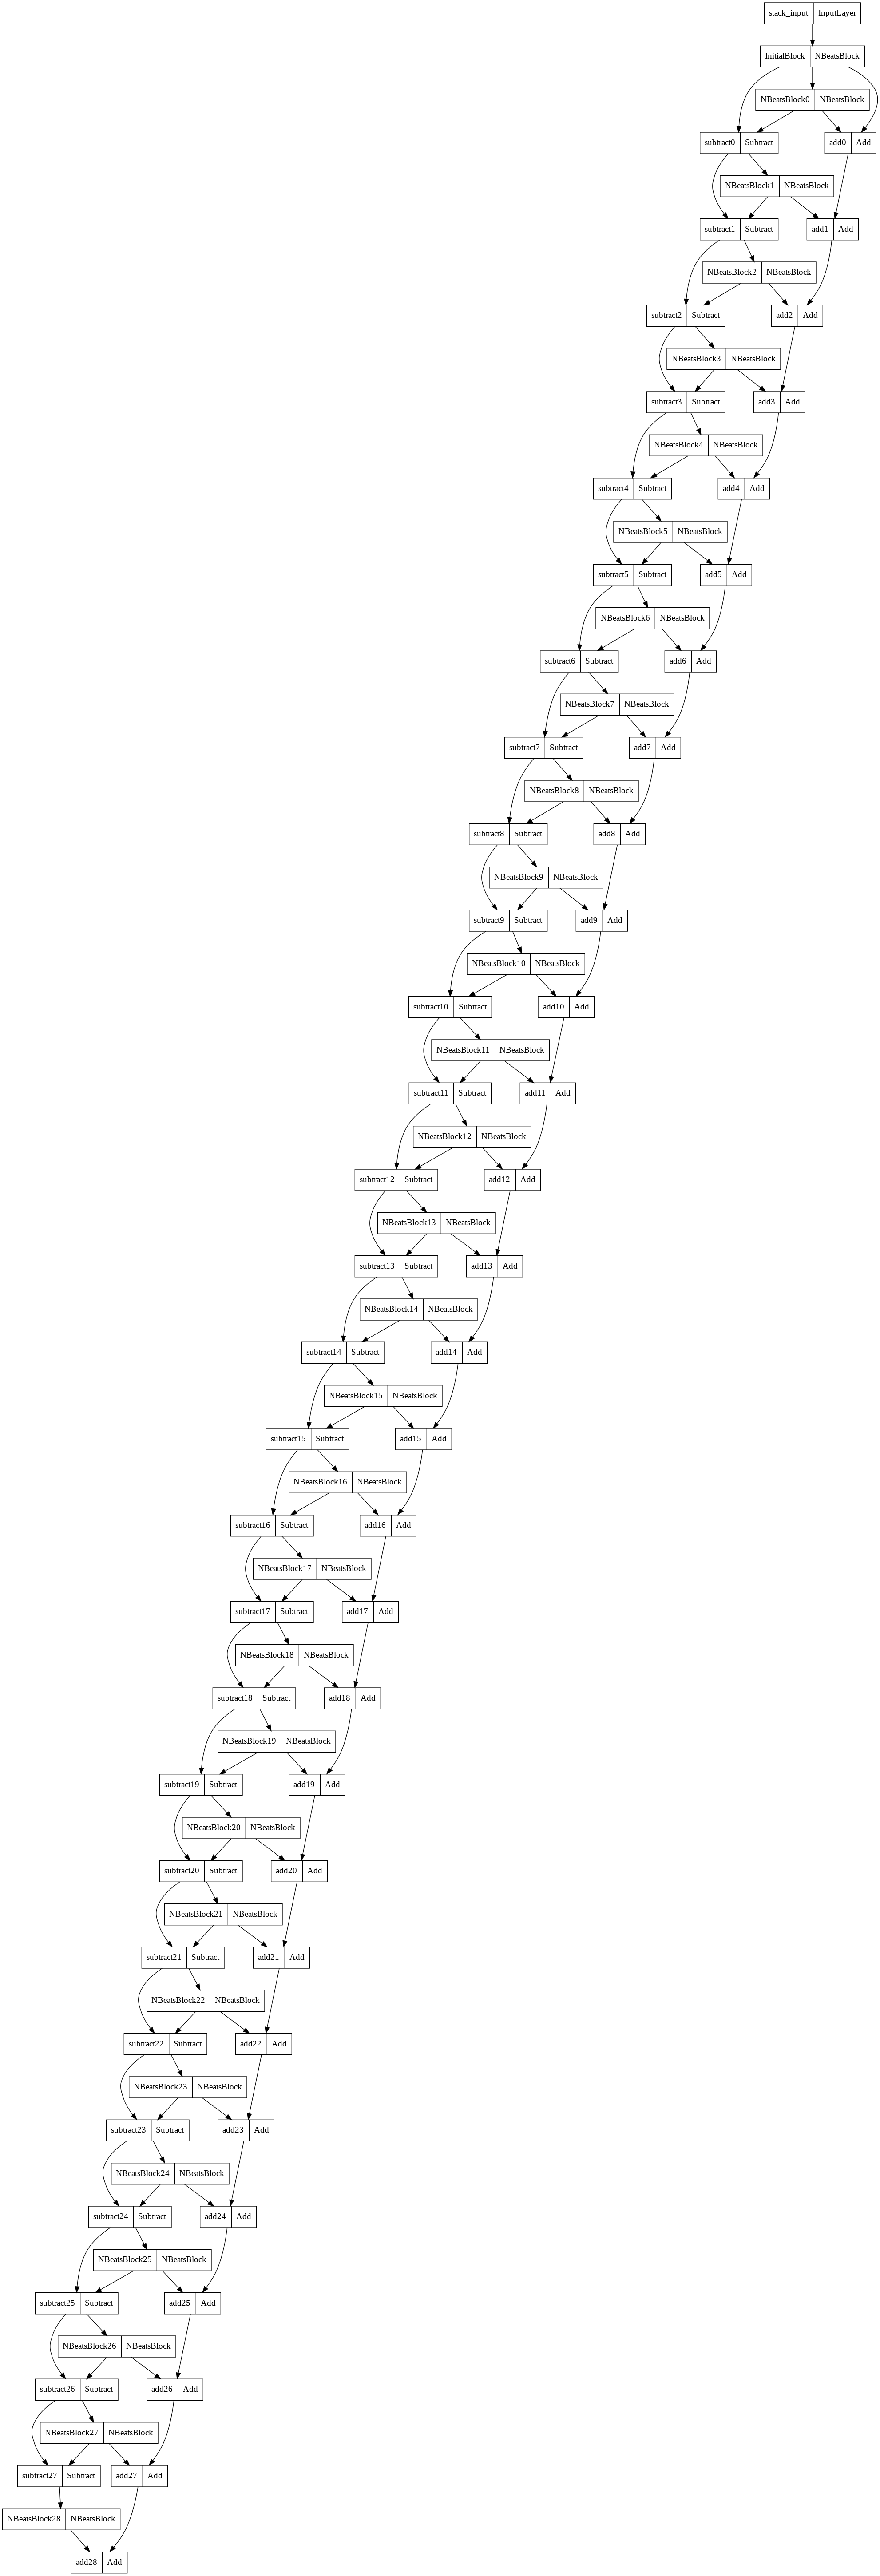

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Creating an Ensemble model



In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE, MAPE loss

  Ex. If num_iter = 10, a list of 30 trained models will be returned.
  10 * len(["mae", "mse", "mape"])
  """

  # Make empty list for ensemble models
  ensemble_models = []

  # Create num_iter no. of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a diff. loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model
      model = tf.keras.Sequential([
                                    layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
                                    layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
                                    layers.Dense(horizon)
      ])
      # Compile the model
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])
      # Fit the current model
      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                  patience = 100,
                                                                  verbose = 1)])
      ensemble_models.append(model)
  
  return ensemble_models


In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 798: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 610: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 726: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 826: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 973: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 408: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 508: ReduceLROnPl

In [ ]:
len(ensemble_models), ensemble_models

(15,
  <keras.engine.sequential.Sequential at 0x7f786e560390>])

### Making predictions with ensemble model

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  predictions = []
  for model in ensemble_models:
    predictions.append(make_preds(model, test_dataset))

  return tf.constant(tf.squeeze(predictions))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8807.488,  8782.733,  9031.849, ..., 50094.97 , 49184.703,
        46495.086],
       [ 8770.868,  8746.126,  9054.787, ..., 49379.035, 48531.258,
        45355.34 ],
       [ 8745.424,  8733.031,  9101.386, ..., 49267.17 , 47660.434,
        45370.047],
       ...,
       [ 8949.124,  8804.587,  9079.531, ..., 49844.12 , 49590.984,
        46666.555],
       [ 8724.686,  8802.303,  9099.539, ..., 49565.293, 48510.19 ,
        45039.484],
       [ 8815.255,  8762.153,  9043.877, ..., 49738.727, 48042.465,
        45861.28 ]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8793.626, 8778.281, 9066.728, 8734.786, 8743.922, 8717.704,
       8669.008, 8482.519, 8458.423, 8530.737], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median[:10]

array([8790.361, 8777.066, 9061.539, 8718.201, 8743.613, 8717.235,
       8664.585, 8478.888, 8455.375, 8528.448], dtype=float32)

In [ ]:
ensemble_results = evaluate_preds(y_test,
                                  ensemble_mean)
ensemble_results

{'mae': 566.6429,
 'mse': 1145090.8,
 'rmse': 1070.0891,
 'mape': 2.579301,
 'mase': 0.9954346}

In [ ]:
ensemble_results = evaluate_preds(y_test,
                                  ensemble_median)
ensemble_results

{'mae': 567.423,
 'mse': 1150133.2,
 'rmse': 1072.4426,
 'mape': 2.5781205,
 'mase': 0.996805}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

### Plotting the prediction intervals of our ensemble

So far we've been making point predictions with our models.

Ex. horizon = 1, our model predicts tomorrow's price of BTC. It would be more helpful to predict a range of values.

One way to get 95% confidence prediction intervals for a deep learning model is the bootstrap method.
1. Take the predictions from a number of randomly initialized models (we got this thanks to our ensemble models).
2. Measure the standard deviation of the predictions.
3. Multiply the standard deviation by 1.96 (assuming our data is in Gaussian/Normal distribution, 95% of observations fall within 1.96 standard deviations of the mean).
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1).

In [ ]:
ensemble_std = tf.math.reduce_std(ensemble_preds, axis = 0)
ensemble_std.shape

TensorShape([556])

In [ ]:
result = ensemble_std * 1.96
pred_upper, pred_lower = tf.add(result, ensemble_mean), tf.subtract(result, ensemble_mean)
pred_upper.shape, pred_lower.shape

(TensorShape([556]), TensorShape([556]))

In [ ]:
def get_upper_lower_preds(preds):
  std = tf.math.reduce_std(preds, axis = 0)
  interval = std * 1.96
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
lower, upper = get_upper_lower_preds(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8691.329 ,  8730.232 ,  9012.288 ,  8629.519 ,  8681.744 ,
         8659.182 ,  8605.118 ,  8401.179 ,  8403.422 ,  8497.123 ,
         8132.553 ,  8056.2246,  8002.6084,  7535.3574,  7202.649 ,
         7217.8354,  6971.2495,  7138.7666,  7001.209 ,  7468.0903,
         7310.5405,  7689.8247,  7488.012 ,  7304.362 ,  7258.288 ,
         7258.4546,  7145.122 ,  7362.2256,  7474.715 ,  7509.525 ,
         7490.72  ,  7274.229 ,  7192.3394,  7144.512 ,  7147.187 ,
         7188.775 ,  7035.004 ,  7078.17  ,  6806.2876,  6526.605 ,
         7274.5327,  7076.5786,  7086.597 ,  7168.0874,  7105.995 ,
         7076.9673,  7185.672 ,  7182.5303,  7152.84  ,  7187.2007,
         7279.2676,  7352.332 ,  7201.984 ,  7135.672 ,  7133.5127,
         6899.5293,  7236.2856,  7292.874 ,  7319.7334,  7622.633 ,
         7979.1543,  8079.405 ,  7787.9604,  8022.7617,  8021.8   ,
         8131.38  ,  8027.423 ,  8670.112 ,  8813.513 ,  8690.8   ,

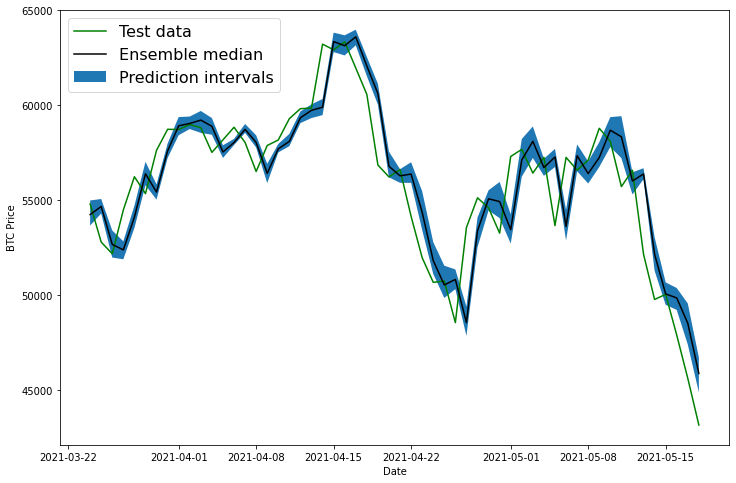

In [ ]:
# Plot the median of our ensemble preds

offset = 500
plt.figure(figsize = (12, 8))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label = "Ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label = "Prediction intervals")
plt.legend(loc = "upper left", fontsize = 16)
plt.show()

## Model 9: Future Prediction model by training on full historical data



In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
btc_prices_windowed_df.head()

,Price (USD),block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
btc_prices_windowed_df.tail()

,Price (USD),block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on the entire data to make predictions on the next day
X_all = btc_prices_windowed_df.dropna().drop(["Price (USD)", "block_reward"], axis = 1).to_numpy()
y_all = btc_prices_windowed_df.dropna()["Price (USD)"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

BATCH_SIZE = 1024
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                                layers.Dense(128, activation ="relu"),
                                layers.Dense(128, activation = "relu"),
                                layers.Dense(HORIZON)
], name = "model_9")

model_9.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"]
                )

history_model_9 = model_9.fit(dataset_all,
                              epochs = 100,
                              verbose = 0
                              )

### Make predictions into future

In [ ]:
# Timesteps to predict into the future
INTO_FUTURE = 14


We need a function to predict into the future which:

1. Takes as input:
  * a list of values (BTC historical data)
  * a trained model (`model_9`)
  * a window into the future to predict (`INTO_FUTURE`)
  * the window size the model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts and extracts the last `WINDOW_SIZE` values from the input values.
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [ ]:
def make_forecasts(values, model, into_future, window_size = WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Predicting on:\n {last_window} -> Prediction:{tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_forecasts(values = y_all,
                                 model = model_9,
                                 into_future = INTO_FUTURE,
                                 window_size = WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction:55764.46484375

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction:50985.9453125

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction:48522.96875

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96875   ] -> Prediction:48137.203125

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96875    48137.203125  ] -> Prediction:47880.6328125

Predicting on:
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96875    48137.203125   47880.6328125 ] -> Prediction:46879.71484375

Predicting on:
 [43144.47129086 55764.46484375 50985.9453125  48522.96875
 48137.203

In [ ]:
btc_prices_windowed_df.tail()

,Price (USD),block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
future_forecast

[55764.465,
 50985.945,
 48522.97,
 48137.203,
 47880.633,
 46879.715,
 48227.598,
 53963.69,
 49685.56,
 47596.176,
 48114.426,
 48808.004,
 48623.848,
 50178.723]

In [ ]:
def get_future_dates(start_date, into_future, offset = 1):
  """
  Returns array of datetime values ranging from start_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for Date
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date

  return np.arange(start_date, end_date, dtype = "datetime64[D]") # return a date range from start_date to end_date


In [ ]:
# Last timestep of timesteps
last_timestep = btc_usd_df.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date= last_timestep, into_future = INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

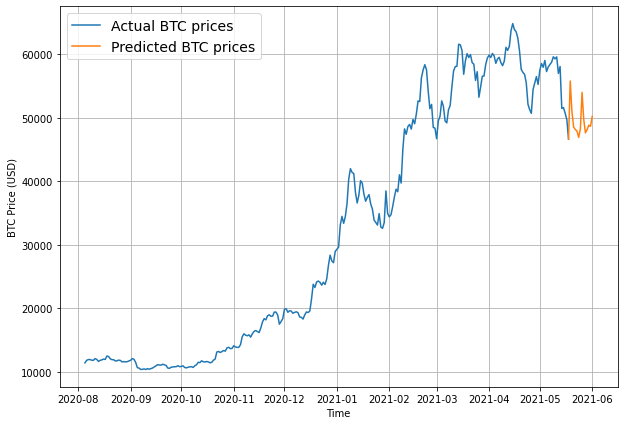

In [ ]:
# Plot future BTC prices predictions
plt.figure(figsize = (10, 7))
plot_time_series(btc_usd_df.index, btc_price, start = 2500, format = "-", label = "Actual BTC prices")
plot_time_series(next_time_steps, future_forecast, format = "-", label = "Predicted BTC prices")

## Model 10: The turkey problem (Why forecasting is BS)

In [ ]:
# Let's introduce a turkey problem to our BTC data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
btc_price_turkey[-10:]

[59575.4631145794,
 59249.141676133,
 59560.0254591057,
 56956.075029342,
 58036.5097771205,
 51448.7985760232,
 51578.3125446899,
 50690.8029495356,
 49670.4141738148,
 466.22853437484895]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(btc_usd_df.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

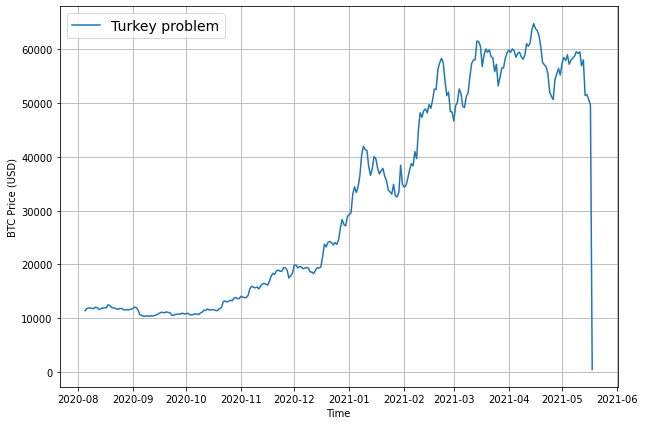

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 prices = btc_price_turkey,
                 format = "-",
                 label = "Turkey problem",
                 start = 2500)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size = WINDOW_SIZE, horizon = HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model

In [ ]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"

turkey_model.compile(loss = "mae",
                     optimizer = tf.keras.optimizers.Adam()
                     )

turkey_model.fit(X_train,
                 y_train,
                 epochs = 100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test, y_test),
                 callbacks = [create_model_checkpoint(model_name = turkey_model.name)])

In [ ]:
# Evaluate turkey model
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 613.7852


613.78515625

In [ ]:
best_turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model/")
best_turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 613.7852


613.78515625

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 17600.756,
 'mse': 650880060.0,
 'rmse': 24408.283,
 'mape': 121.09627,
 'mase': 28.875364}

In [ ]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.9,
 'rmse': 1082.4712,
 'mape': 2.5448983,
 'mase': 0.9994894}

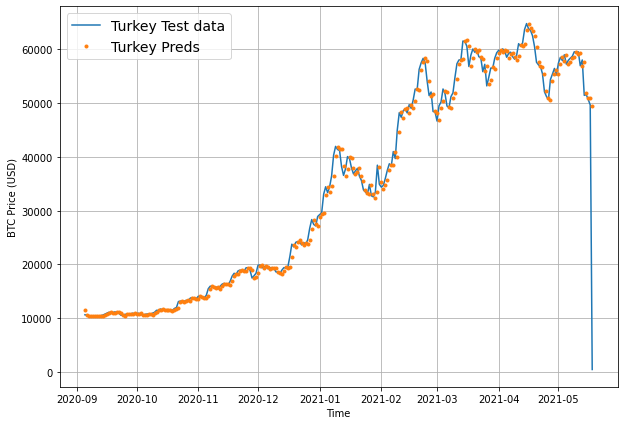

In [ ]:
plt.figure(figsize = (10, 7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 prices = btc_price_turkey[-len(y_test):],
                 format = "-",
                 label = "Turkey Test data",
                 start = offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 prices = turkey_preds,                 
                 label = "Turkey Preds",
                 start = offset)

In [ ]:
model_results = pd.DataFrame({"naive model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_Conv1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_nbeats":model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T

model_results

,mae,mse,rmse,mape,mase
naive model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951050,1.171744e+06,1082.471191,2.544898,0.999489
model_2_dense_w30_h1,608.961975,1.281441e+06,1132.007324,2.769341,1.064471
model_3_dense_w30_h7,1234.883789,5.393734e+06,1419.136230,5.487499,2.197406
model_4_Conv1D,570.828308,1.176671e+06,1084.744751,2.559335,1.002787
model_5_LSTM,597.462341,1.275416e+06,1129.343140,2.691097,1.049576
model_6_multivariate,568.036011,1.166216e+06,1079.914795,2.546599,0.997882
model_7_nbeats,572.737793,1.178278e+06,1085.484985,2.586273,1.006142
model_8_ensemble,567.422974,1.150133e+06,1072.442627,2.578120,0.996805
model_10_turkey,17600.755859,6.508801e+08,24408.283203,121.096268,28.875364


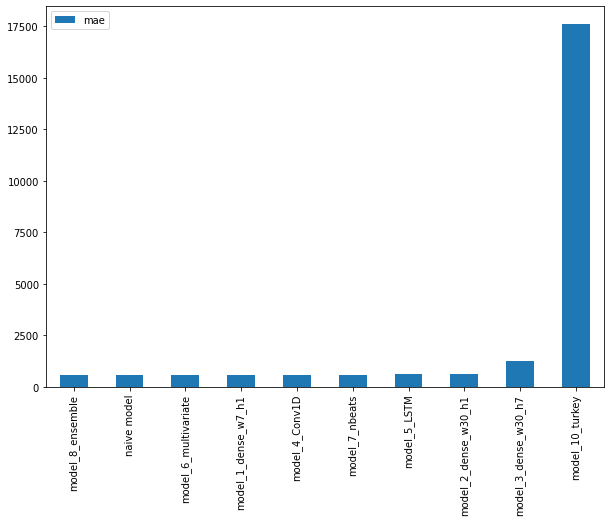

In [ ]:
model_results[["mae"]].sort_values(by = "mae").plot(figsize= (10, 7), kind = "bar")